In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup


In [2]:
starbucks_response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")

In [3]:
from bs4 import BeautifulSoup
starbs_soup = BeautifulSoup(starbucks_response.content, "html.parser")

In [4]:

#test 
star_table=(starbs_soup.find_all("table"))[0]
star_table

<table class="wpr-table"><thead class="table-head bg-wpr-table_header_bg relative z-40 px-0 py-0 text-xs uppercase tracking-wider"><tr><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 pin left-0 z-50 border-l-0"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">State</div></div></th><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 z-40"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">Starbucks Stores 2023<svg class="icon icon-tabler icon-tabler-chevron-down" fill="none" height="14" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" viewbox="0 0 24

In [5]:
starbs= []

# iterate over all rows in the population table
for row in star_table.find_all("tr")[1:]:

  #state
  state= row.find("th").text

#Cells for num of starbucks
  cells = row.find_all('td')
  #Year
  year2023 = cells[0].text
  year2021 = cells[1].text
  year2024 = cells[2].text

  

  starbs.append({
                "State": state,
                "2024": year2024,
                "2023": year2023,
                "2021": year2021,
  })

In [6]:
starbs = pd.DataFrame(starbs)

In [7]:
#melt
starbs_melt= starbs.melt(id_vars=["State"], var_name='Year', value_name="Stores")

In [8]:
starbs_melt["Chain"] = "Starbucks"
starbs_melt.head()

,State,Year,Stores,Chain
0,California,2024,"3,117",Starbucks
1,Texas,2024,"1,409",Starbucks
2,Florida,2024,892,Starbucks
3,Washington,2024,736,Starbucks
4,New York,2024,715,Starbucks


In [9]:
dunkin_response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")

In [10]:
from bs4 import BeautifulSoup
dunks_soup = BeautifulSoup(dunkin_response.content, "html.parser")

In [11]:
dunkin_table=(dunks_soup.find_all("table"))[0]
#dunkin_table

In [12]:
dunky= []

# iterate over all rows in the population table
for row in dunkin_table.find_all("tr")[1:]:

  #state
  state= row.find("th").text

  #Cells for num of dunkin
  cells = row.find_all('td')
  #Year
  year2024 = cells[0].text
  year2023 = cells[1].text
 

  

  dunky.append({
                "State": state,
                "2024": year2024,
                "2023": year2023
               
  })

In [13]:
dunky =pd.DataFrame(dunky)
dunky.head()

,State,2024,2023
0,New York,"1,431","1,414"
1,Massachusetts,"1,042","1,068"
2,Florida,909,883
3,New Jersey,872,866
4,Illinois,711,692


In [14]:
#melt
dunky_melt= dunky.melt(id_vars=["State"], var_name='Year', value_name="Stores")
dunky_melt

,State,Year,Stores
0,New York,2024,"1,431"
1,Massachusetts,2024,"1,042"
2,Florida,2024,909
3,New Jersey,2024,872
4,Illinois,2024,711
...,...,...,...
97,Montana,2023,0
98,North Dakota,2023,0
99,Oregon,2023,0
100,South Dakota,2023,0


In [15]:
#create chian column
dunky_melt["Chain"] = "Dunkin"
dunky_melt.head()

,State,Year,Stores,Chain
0,New York,2024,"1,431",Dunkin
1,Massachusetts,2024,"1,042",Dunkin
2,Florida,2024,909,Dunkin
3,New Jersey,2024,872,Dunkin
4,Illinois,2024,711,Dunkin


In [16]:
starbs_dunky= pd.concat([starbs_melt, dunky_melt],ignore_index=True)
starbs_dunky

,State,Year,Stores,Chain
0,California,2024,"3,117",Starbucks
1,Texas,2024,"1,409",Starbucks
2,Florida,2024,892,Starbucks
3,Washington,2024,736,Starbucks
4,New York,2024,715,Starbucks
...,...,...,...,...
250,Montana,2023,0,Dunkin
251,North Dakota,2023,0,Dunkin
252,Oregon,2023,0,Dunkin
253,South Dakota,2023,0,Dunkin


In [17]:
#wiki table
wiki_response = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")

In [18]:
from bs4 import BeautifulSoup
wiki_soup = BeautifulSoup(wiki_response.content, "html.parser")

In [19]:
wiki_table=(wiki_soup.find_all("table"))[0]
#wiki_table


In [20]:
row =wiki_table.find_all("tr")[1]
#row test

In [21]:
#test
cell= row.find_all('td')
cell[2].get_text(strip=True)

'California'

In [22]:
wiki = []

# iterate over all rows in the population table
for row in wiki_table.find_all("tr")[1:]:


    # Get all the cells (<td>) in the row.
    #state
    cells = row.find_all("td")
    state=cells[2].get_text(strip=True)


 #find population
    pop = cells[3].get_text(strip=True)


    # Append this data.
    wiki.append({
        "State": state,
        "Population": pop,
})

In [23]:
wiki=pd.DataFrame(wiki)

In [24]:
final_merged = pd.merge(wiki, starbs_dunky, how="inner", on='State')

In [25]:
# turn year into numeric to merge
final_merged['Year'] = pd.to_numeric(final_merged['Year'], errors = 'coerce')

In [26]:
stock_price = {
    'Year'  : [2024, 2023, 2021, 2024, 2023],
    "Chain" : ["Starbucks","Starbucks", "Starbucks", "Dunkin", "Dunkin"],
    "Stock" : [98.91, 95.98, 116.28, 106.48, 106.48]
    }

stock = pd.DataFrame(stock_price)
final_merged = pd.merge(final_merged, stock, on = ["Chain", "Year"], how = 'outer')
final_merged = final_merged.sort_values(by = "State").reset_index(drop = True)

In [27]:
final_merged

,State,Population,Year,Stores,Chain,Stock
0,Alabama,"5,024,279",2023,59,Dunkin,106.48
1,Alabama,"5,024,279",2023,85,Starbucks,95.98
2,Alabama,"5,024,279",2024,69,Dunkin,106.48
3,Alabama,"5,024,279",2021,99,Starbucks,116.28
4,Alabama,"5,024,279",2024,,Starbucks,98.91
...,...,...,...,...,...,...
250,Wyoming,"576,851",2023,1,Dunkin,106.48
251,Wyoming,"576,851",2023,23,Starbucks,95.98
252,Wyoming,"576,851",2024,1,Dunkin,106.48
253,Wyoming,"576,851",2021,26,Starbucks,116.28


In [28]:
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
            'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 
            'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 
               'North Dakota', 'South Dakota']
south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 
             'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 
             'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 
             'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 
            'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 
            'Hawaii', 'Oregon', 'Washington']

In [29]:
def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Unknown'

In [30]:
final_merged['Region'] = final_merged['State'].apply(assign_region)
final_merged

,State,Population,Year,Stores,Chain,Stock,Region
0,Alabama,"5,024,279",2023,59,Dunkin,106.48,South
1,Alabama,"5,024,279",2023,85,Starbucks,95.98,South
2,Alabama,"5,024,279",2024,69,Dunkin,106.48,South
3,Alabama,"5,024,279",2021,99,Starbucks,116.28,South
4,Alabama,"5,024,279",2024,,Starbucks,98.91,South
...,...,...,...,...,...,...,...
250,Wyoming,"576,851",2023,1,Dunkin,106.48,West
251,Wyoming,"576,851",2023,23,Starbucks,95.98,West
252,Wyoming,"576,851",2024,1,Dunkin,106.48,West
253,Wyoming,"576,851",2021,26,Starbucks,116.28,West


In [31]:
#final_merged['Dunkin Stores'] = final_merged['Dunkin Stores'].str.replace(',', '').astype(int)

In [32]:
#automate

def webscrape(url):
    
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    table=(soup.find_all("table"))[0]

    df= []
    store= url.split('/')[-1]
    store_name = store.split('-')[0]

# iterate over all rows in the population table
    for row in table.find_all("tr")[1:]:

        #state
        state= row.find("th").text

        #number of stores
        num=row.find("td").text

        df.append({
                "State": state,
                store_name: num,
    })
    df =pd.DataFrame(df)
    return df
 

In [33]:
#test url: Walmart
webscrape("https://worldpopulationreview.com/state-rankings/walmart-stores-by-state")

,State,walmart
0,Texas,517
1,Florida,341
2,California,280
3,North Carolina,192
4,Georgia,189
5,Illinois,161
6,Ohio,146
7,Missouri,137
8,Tennessee,137
9,Pennsylvania,134


In [34]:
from plotnine import *

In [35]:
#Turn pop into int 
final_merged['Population'] = final_merged['Population'].str.replace(',', '').astype(int)

In [36]:
# turn year into numeric to merge
final_merged['Stores'] = pd.to_numeric(final_merged['Stores'], errors = 'coerce')
final_merged['Population'] = pd.to_numeric(final_merged['Population'], errors = 'coerce')

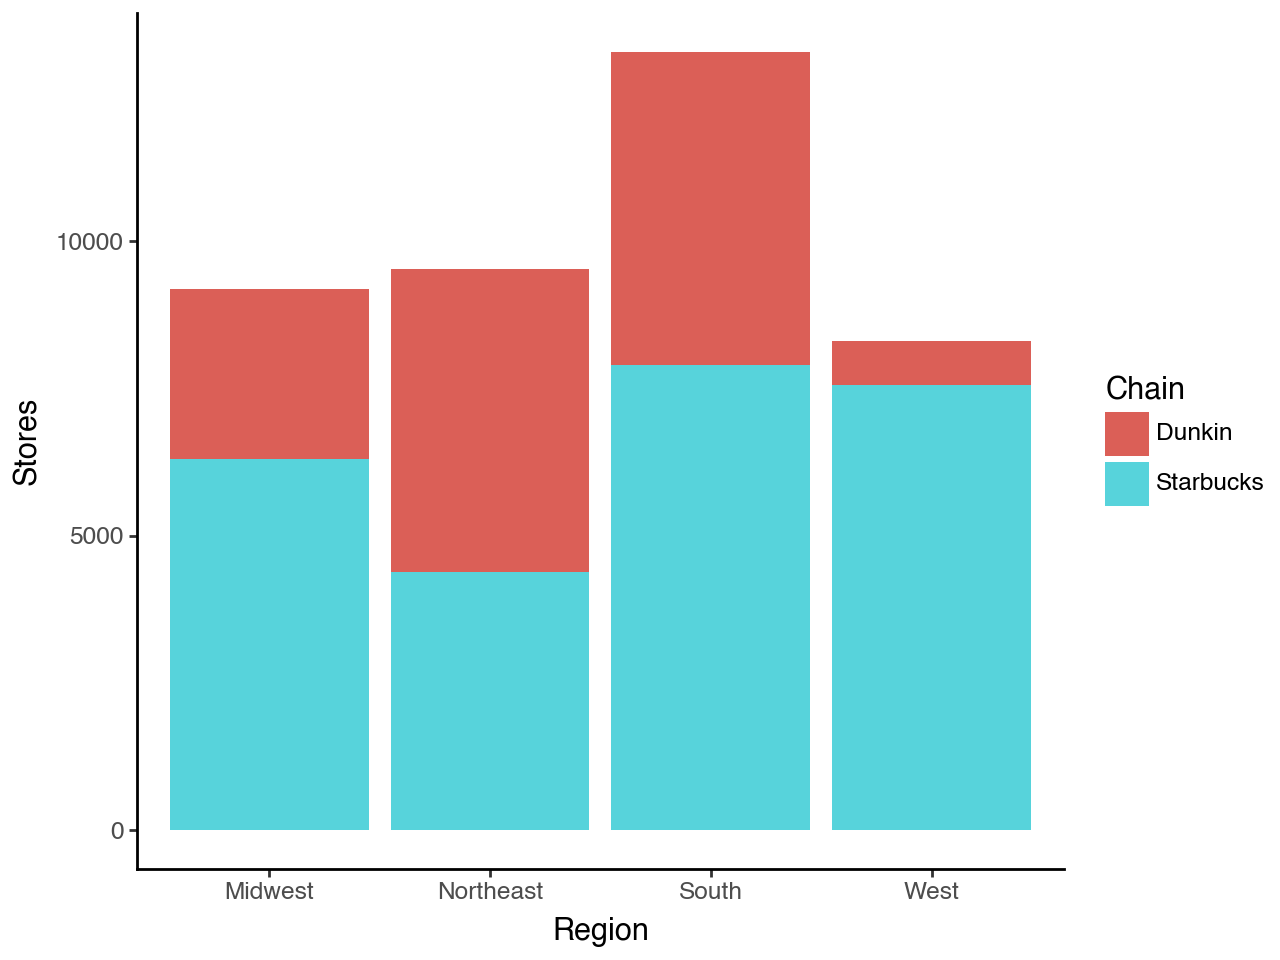

In [37]:
final_graph = final_merged.groupby(["Region","Chain"])["Stores"].sum().reset_index()

(ggplot(final_graph,
aes(
    x= "Region",
    y="Stores",
    fill = "Chain",
))
+geom_bar(stat='identity', position= 'stack')
+theme_classic()
)

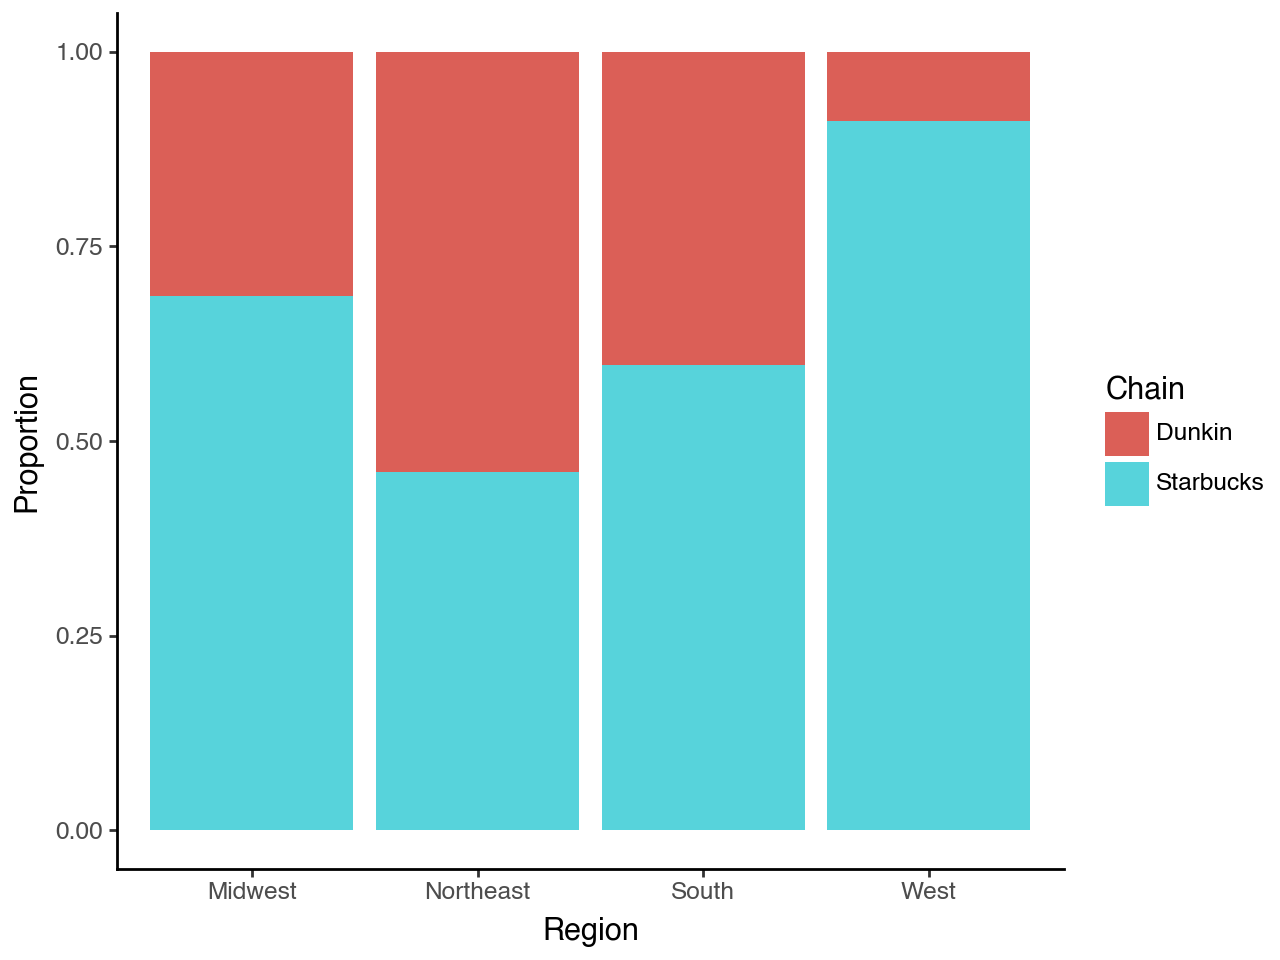

In [38]:

# storesin each region 
final_graph['Total_Stores'] = final_graph.groupby('Region')['Stores'].transform('sum')

# calc the proportion
final_graph['Proportion'] = final_graph['Stores'] / final_graph['Total_Stores']

#plot
(ggplot(final_graph,
        aes(x="Region", y="Proportion", fill="Chain"))
 + geom_bar(stat="identity", position="stack")
 + theme_classic()
)


We can see from the graphs above that while there appears to overall be a larger number of Starbucks stores, there are defeintly regions where you can see propotionaly high numbers of a single one. In the West states there is a clear majority of Starbucks having more stores. In counts and proportionatley to the number of stores they have. In the Northeast there is the highest amount of Dunkin Donut stores. This tells us that the chain of restaurant looks at the regions they are placing their stores. 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 53 rows containing missing values.


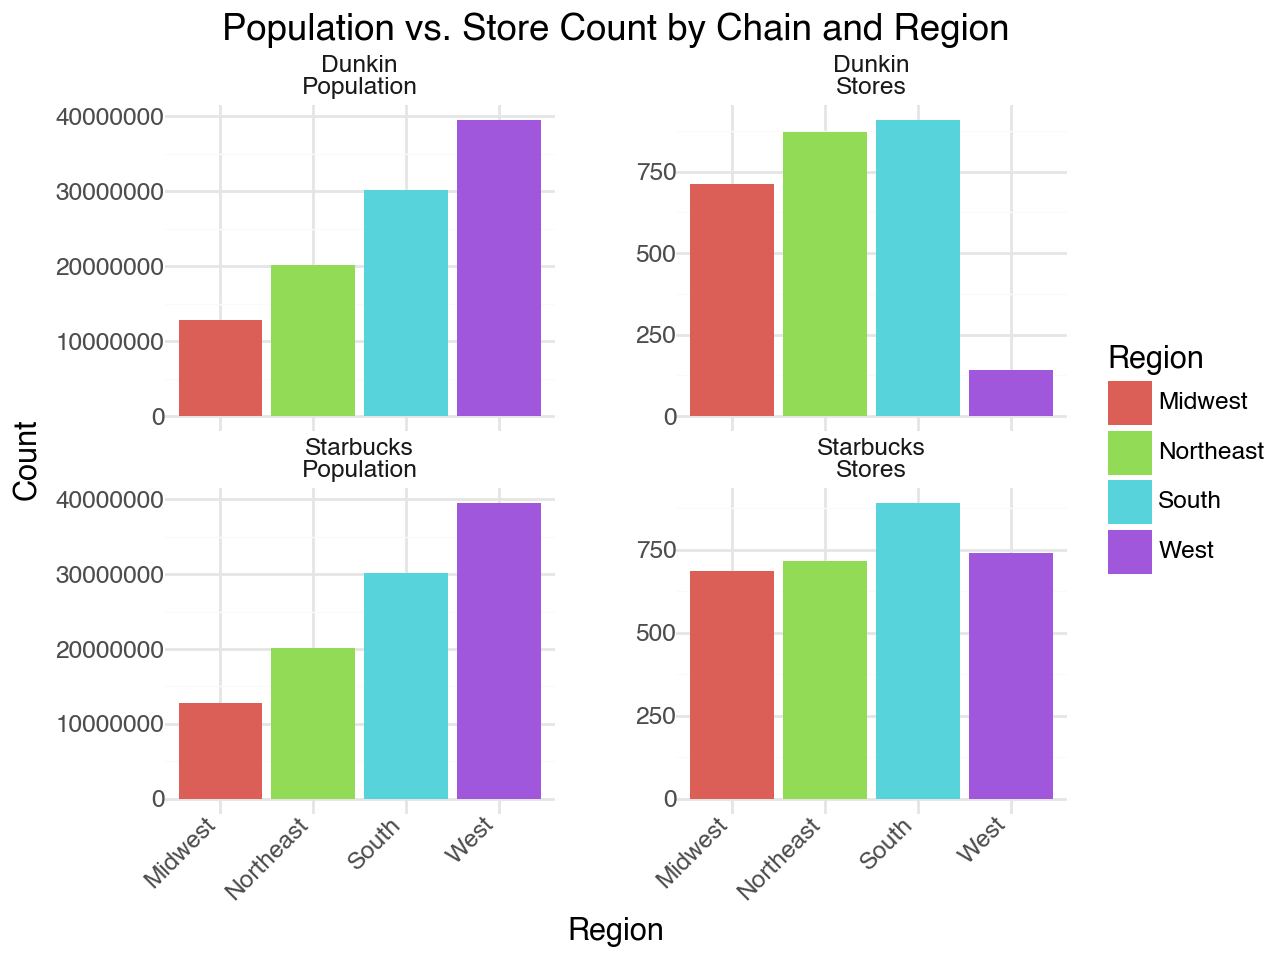

In [39]:
final_graph3= pd.melt(final_merged, id_vars=["Region", "Chain"],
                    value_vars=["Stores", "Population"],
                    var_name="Metric", 
                    value_name="Count")

(
    ggplot(final_graph3)
    + aes (x='Region', y='Count', fill='Region')
    + geom_bar (stat='identity', position='dodge')
    + facet_wrap('~Chain + Metric', scales= 'free_y')

    + labs (title="Population vs. Store Count by Chain and Region", x="Region", y="Count")
    + theme_minimal ()
    + theme (axis_text_x=element_text(rotation=45, hjust=1))
)

This graph shows that while the population is the same, stores counts per chain depend on the region. We can see that Dunkin Donuts has a very low presence in the West. We can also see that in some regions there are just a lot of coffee shops in general. This could indicate trends of these states consuming more coffee. It is also important to look at the ppulation. Even though there are less coffee shops in the Midwest, this could be due to lower overall population.

In [40]:
final_merged.head()

,State,Population,Year,Stores,Chain,Stock,Region
0,Alabama,5024279,2023,59.0,Dunkin,106.48,South
1,Alabama,5024279,2023,85.0,Starbucks,95.98,South
2,Alabama,5024279,2024,69.0,Dunkin,106.48,South
3,Alabama,5024279,2021,99.0,Starbucks,116.28,South
4,Alabama,5024279,2024,NaN,Starbucks,98.91,South


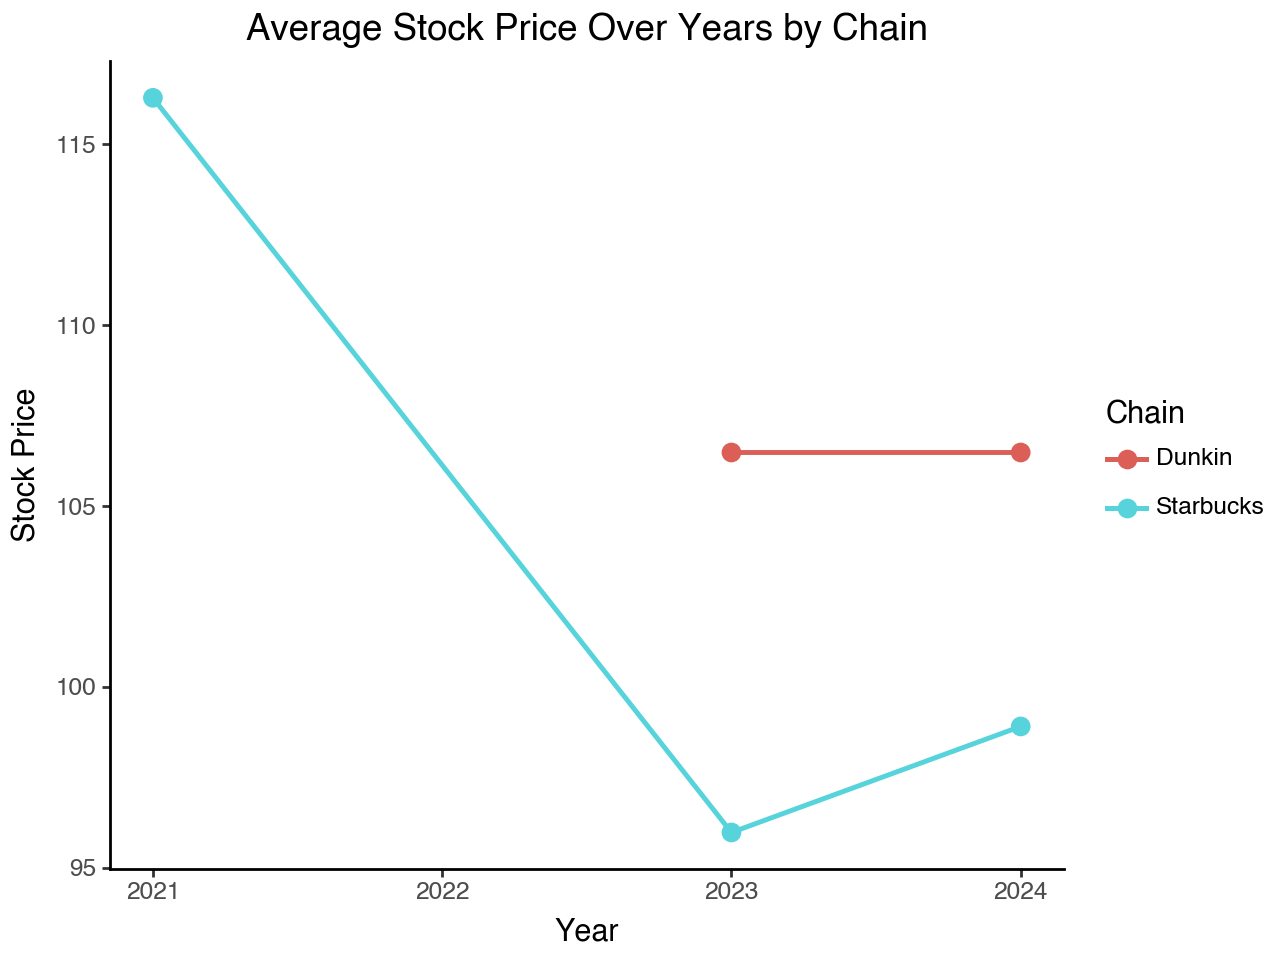

In [41]:
#merge
stock_data = final_merged.groupby(['Year', 'Chain']).agg({'Stock': 'mean'}).reset_index()

#sort data
stock_data = stock_data.sort_values(by=['Year', 'Chain'])

#plot
(
    ggplot(stock_data, aes(x='Year', y='Stock', color='Chain', group='Chain')) 
    +geom_line(size=1) 
    +geom_point(size=3) 
   + labs(title='Average Stock Price Over Years by Chain',
         x='Year',
         y='Stock Price') 
    +theme_classic()
)

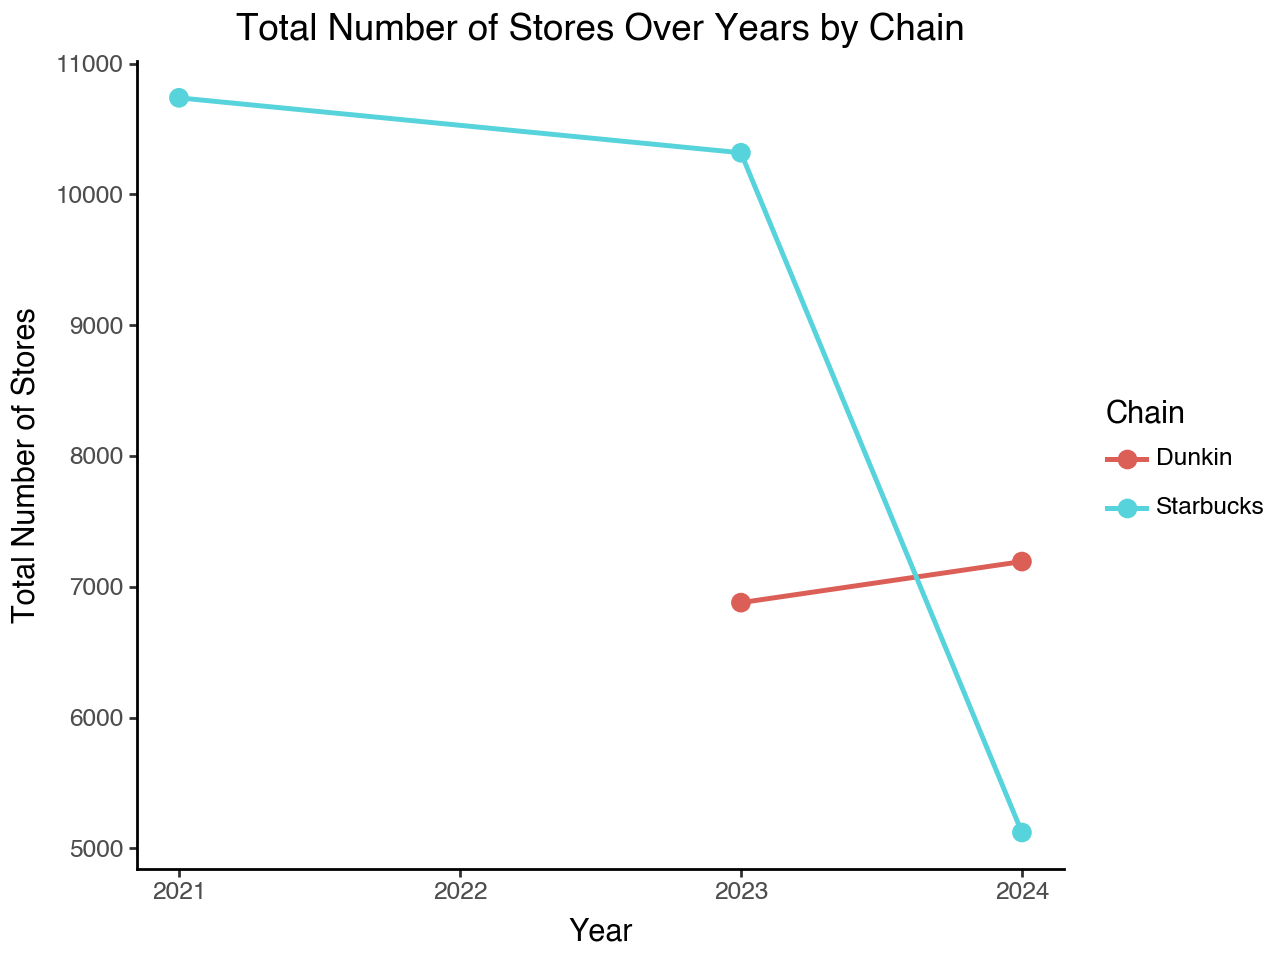

In [42]:
#year and chain 
store_data = final_merged.groupby(['Year', 'Chain']).agg({'Stores': 'sum'}).reset_index()


(
    ggplot(store_data, aes(x='Year', y='Stores', color='Chain', group='Chain')) 
    +geom_line(size=1)
    +geom_point(size=3)
    +labs(title='Total Number of Stores Over Years by Chain',
         x='Year',
         y='Total Number of Stores') 
    +theme_classic()
)


Comparing these two line graphs with each other we can see that since Starbucks had a drop in their stock price in 2023, they took action to decrease their number of stores in 2024. This is likely due to teh mass boycotting that occured/occurs with customers views on politics and Starbucks support.

 We can see these two significant drops happen in their respective graphs. It is a little harder to look at the data from Dunkin Donuts as the company went private in 2020. I took the last stock price I could find and held it constant. Overall it looks like the stcok price shouldn't have too dramatic of a change since there have not been any scandals or big breaks regarding the company. 

In [43]:
state_data = (
    final_merged.groupby("State")
    .agg(mean_vol=("Stores", "mean"))
    .nlargest(5, "mean_vol")
    .reset_index()
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


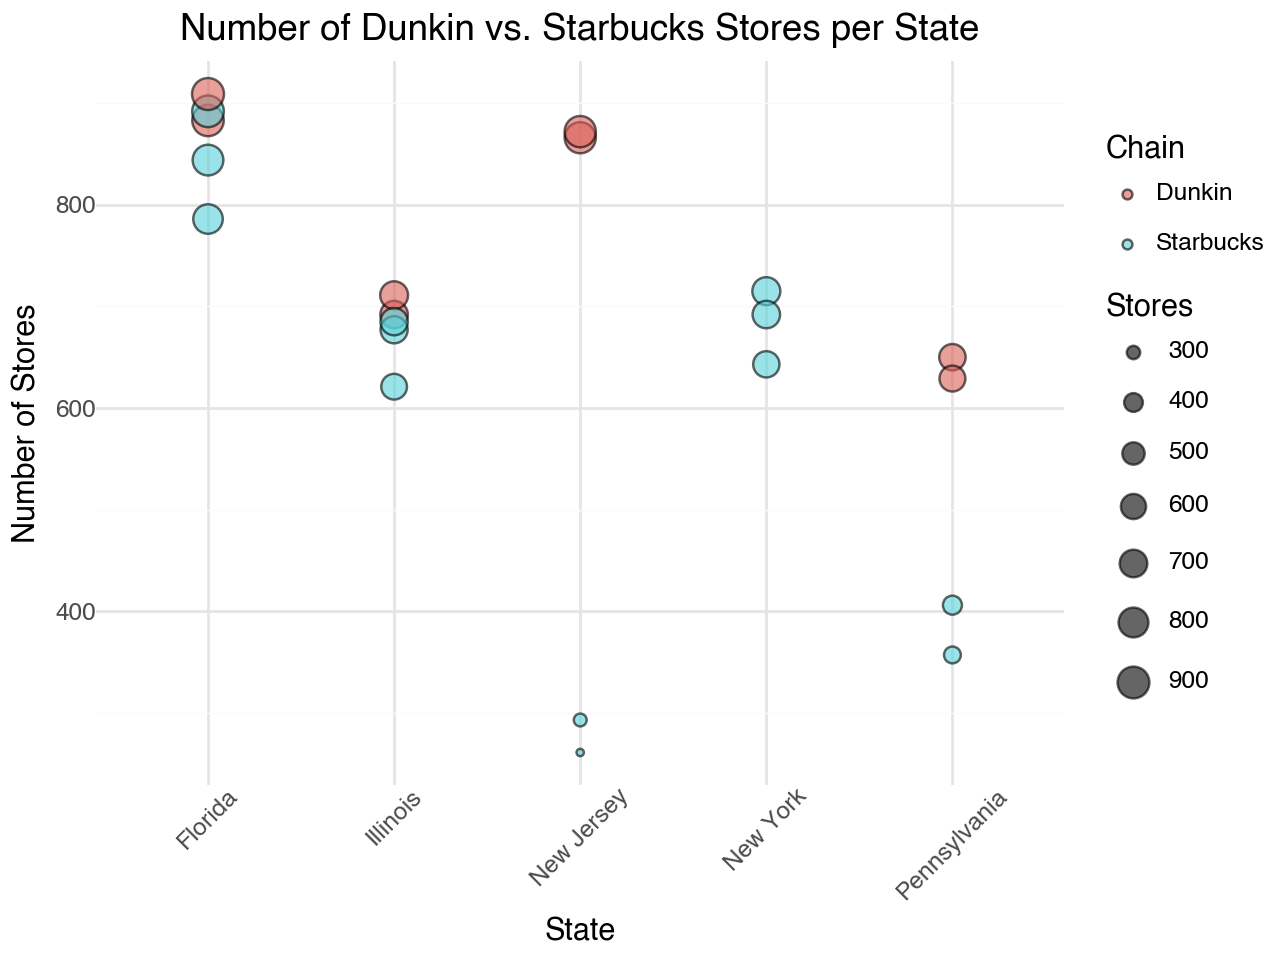

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/pprint.py:629: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


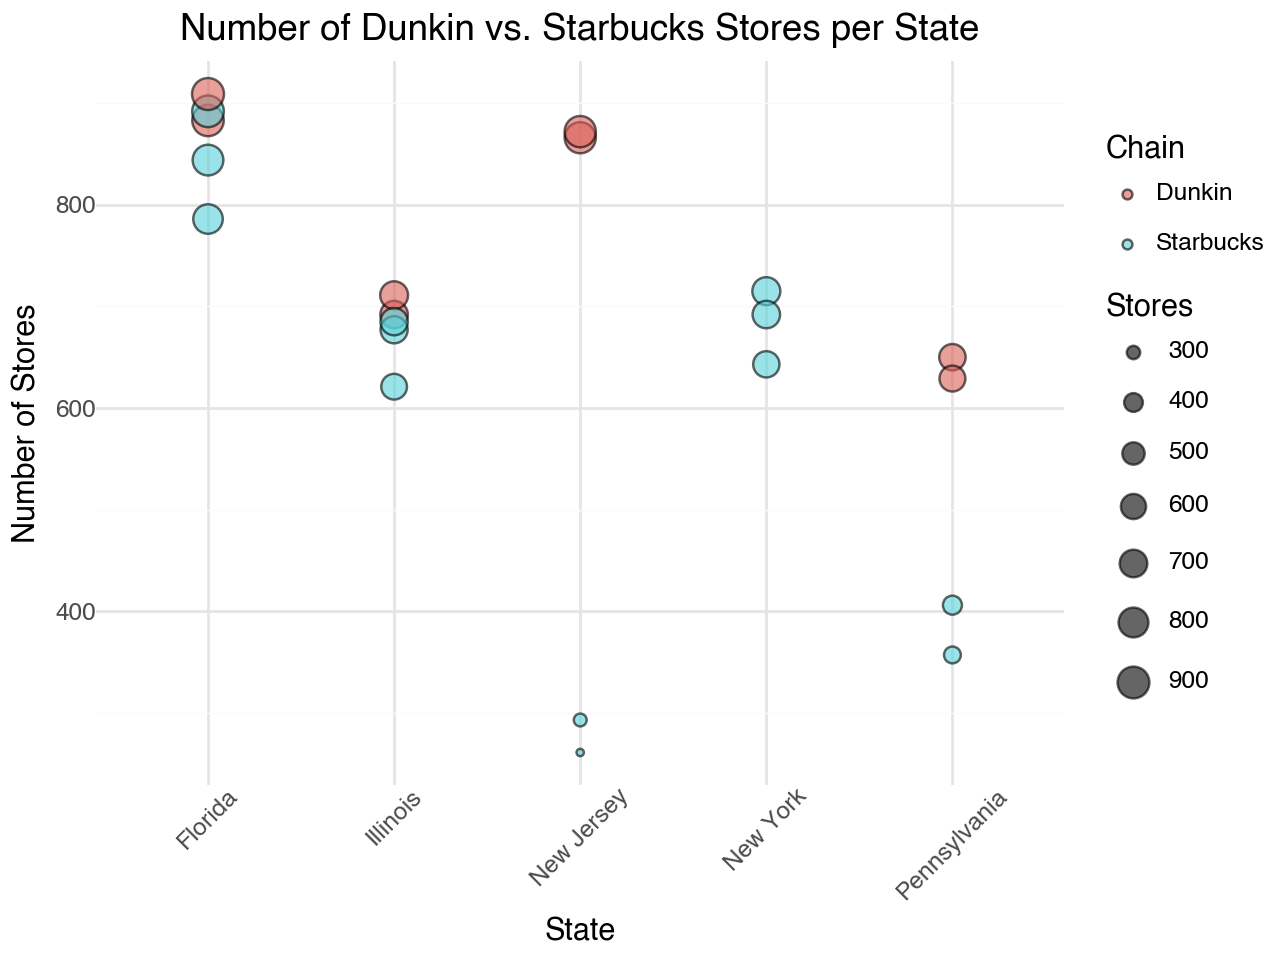

In [45]:


final_graph2 = final_merged[final_merged["State"].isin(state_data["State"])]

(
    ggplot(final_graph2, aes(x="State", y="Stores", fill="Chain", size="Stores"))
    + geom_point(alpha=0.6, color="black", stroke=0.5)
    + labs(title="Number of Dunkin vs. Starbucks Stores per State", x="State", y="Number of Stores")
    + theme_minimal()
    + theme(axis_text_x=element_text(angle=45))
)



This chart looks at the top 5 states with the highest number of stores, from both companies. It is interesting to see that these states are all on the mid to east coast of the US. Looking at the color and size of bubbles we are able to see how many stores and what chain are in abundance in each state.  